In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
#https://github.com/fraunhoferhhi/BerlinV2X
sidelink='/work/bde/Data/BerlinV2X/sidelink_dataframe.parquet'
cellular='/work/bde/Data/BerlinV2X/cellular_dataframe.parquet'
df = pd.read_parquet(cellular)
""" df = df.drop(columns=[
    'PCell_Downlink_RBs_MCS_0','PCell_Downlink_RBs_MCS_1','PCell_Downlink_RBs_MCS_2','PCell_Downlink_RBs_MCS_3','PCell_Downlink_RBs_MCS_4','PCell_Downlink_RBs_MCS_5',
    'PCell_Downlink_RBs_MCS_6','PCell_Downlink_RBs_MCS_7','PCell_Downlink_RBs_MCS_8','PCell_Downlink_RBs_MCS_9','PCell_Downlink_RBs_MCS_10','PCell_Downlink_RBs_MCS_11',
    'PCell_Downlink_RBs_MCS_12','PCell_Downlink_RBs_MCS_13','PCell_Downlink_RBs_MCS_14','PCell_Downlink_RBs_MCS_15','PCell_Downlink_RBs_MCS_16','PCell_Downlink_RBs_MCS_17',
    'PCell_Downlink_RBs_MCS_18','PCell_Downlink_RBs_MCS_19','PCell_Downlink_RBs_MCS_20','PCell_Downlink_RBs_MCS_21','PCell_Downlink_RBs_MCS_22','PCell_Downlink_RBs_MCS_23',
    'PCell_Downlink_RBs_MCS_24','PCell_Downlink_RBs_MCS_25','PCell_Downlink_RBs_MCS_26','PCell_Downlink_RBs_MCS_27','PCell_Downlink_RBs_MCS_28','PCell_Downlink_RBs_MCS_29',
    'PCell_Downlink_RBs_MCS_30','PCell_Downlink_RBs_MCS_31',
    'SCell_Downlink_RBs_MCS_0','SCell_Downlink_RBs_MCS_1','SCell_Downlink_RBs_MCS_2','SCell_Downlink_RBs_MCS_3','SCell_Downlink_RBs_MCS_4','SCell_Downlink_RBs_MCS_5',
    'SCell_Downlink_RBs_MCS_6','SCell_Downlink_RBs_MCS_7','SCell_Downlink_RBs_MCS_8','SCell_Downlink_RBs_MCS_9','SCell_Downlink_RBs_MCS_10','SCell_Downlink_RBs_MCS_11',
    'SCell_Downlink_RBs_MCS_12','SCell_Downlink_RBs_MCS_13','SCell_Downlink_RBs_MCS_14','SCell_Downlink_RBs_MCS_15','SCell_Downlink_RBs_MCS_16','SCell_Downlink_RBs_MCS_17',
    'SCell_Downlink_RBs_MCS_18','SCell_Downlink_RBs_MCS_19','SCell_Downlink_RBs_MCS_20','SCell_Downlink_RBs_MCS_21','SCell_Downlink_RBs_MCS_22','SCell_Downlink_RBs_MCS_23',
    'SCell_Downlink_RBs_MCS_24','SCell_Downlink_RBs_MCS_25','SCell_Downlink_RBs_MCS_26','SCell_Downlink_RBs_MCS_27','SCell_Downlink_RBs_MCS_28','SCell_Downlink_RBs_MCS_29',
    'SCell_Downlink_RBs_MCS_30','SCell_Downlink_RBs_MCS_31',
    'SCell_Uplink_Num_RBs','SCell_Uplink_TB_Size','SCell_Uplink_Tx_Power_(dBm)',
    ]) """
df.info(verbose=True, show_counts=True)

In [ ]:
#df.head()

In [ ]:
filtered_data = df.dropna(subset='datarate')
filtered_data = filtered_data.query("device == 'pc1'") 
# Operator1 pc1 19564 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:59:59+02:00
#           pc4 9554 entries, 2021-06-22 09:49:54+02:00 to 2021-06-22 15:44:59+02:00
# Operator2 pc2 8779 entries, 2021-06-22 09:49:54+02:00 to 2021-06-22 18:13:59+02:00
#           pc3 14776 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:52:46+02:00
filtered_data = filtered_data.query("measured_qos == 'datarate'")
filtered_data = filtered_data.query("operator == 1")
filtered_data = filtered_data.drop(columns=['device', 'ping_ms', 'Traffic Jam Factor', 'Traffic Street Name', 'Traffic Distance', 'measurement', 'area', 'scenario', 'drive_mode', 'measured_qos', 'operator'])
filtered_data = filtered_data.drop(columns=['jitter', 'ts_gps', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility', 'target_datarate'])
filtered_data = filtered_data.drop(columns=['PCell_MCC', 'PCell_MNC_Digit', 'PCell_MNC', 'PCell_Allowed_Access', 'SCell_Downlink_bandwidth_MHz', 'SCell_Uplink_bandwidth_MHz', 'SCell_MCC', 'SCell_MNC_Digit', 'SCell_MNC', 'SCell_Allowed_Access'])


filtered_data['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(filtered_data['PCell_Downlink_bandwidth_MHz'])
filtered_data['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(filtered_data['PCell_Uplink_bandwidth_MHz'])

filtered_data_downlink = filtered_data.query("direction == 'downlink'").drop(columns=['direction'])
filtered_data_uplink = filtered_data.query("direction == 'uplink'").drop(columns=['direction'])

filtered_data_downlink.info(verbose=True, show_counts=True)

In [ ]:
filtered_data_downlink.head()

In [ ]:
filtered_data_downlink.describe(include='all')

In [ ]:
filtered_data_downlink['date'] = filtered_data_downlink.index

filtered_data_downlink = filtered_data_downlink.ffill(limit=5)
filtered_data_downlink = filtered_data_downlink.fillna(0)

filtered_data_downlink.info(verbose=True, show_counts=True)

In [ ]:
filtered_data_downlink.to_csv('./data/BERLINV2X/filtered_data_downlink.csv', encoding='utf-8', index=False)

In [ ]:
filtered_data_downlink_selected = filtered_data_downlink[[
    'date', 'datarate', 'PCell_Downlink_TB_Size', 'SCell_Downlink_TB_Size', 
    'PCell_SNR_1', 'PCell_SNR_2', 'SCell_SNR_1', 'SCell_SNR_2', 'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSSI_max',  'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRP_max',
    'PCell_Downlink_Average_MCS', 'SCell_Downlink_Average_MCS', 'PCell_Downlink_Num_RBs', 'SCell_Downlink_Num_RBs']]

filtered_data_downlink_selected.info(verbose=True, show_counts=True)
filtered_data_downlink_selected.to_csv('./data/BERLINV2X/filtered_data_downlink_selected.csv', encoding='utf-8', index=False)

filtered_data_downlink_selected_no_date = filtered_data_downlink_selected.drop(columns=['date'])
filtered_data_downlink_selected_no_date.to_csv('./data/BERLINV2X/filtered_data_downlink_selected_no_date.csv', encoding='utf-8', index=False)

In [ ]:
filtered_data_downlink_selected_no_date.to_csv('/work/bde/Data/BerlinV2X-preprocessed-LSTM/filtered_data_downlink_selected_no_date.csv', encoding='utf-8', index=False)

In [ ]:
#filtered_data_downlink['datarate'].plot()

In [ ]:
#filtered_data_downlink['PCell_Downlink_TB_Size'].plot()

In [ ]:
#filtered_data_uplink.info(verbose=True, show_counts=True)

In [ ]:
#filtered_data_uplink.head()

In [ ]:
#filtered_data_uplink['datarate'].plot()

In [ ]:
df_ping = df.dropna(subset='ping_ms')
df_ping.info(verbose=True)

In [ ]:
df_ping.head()

In [ ]:
DIRECTION_downlink = True
# "direction == 'downlink'
# "direction == 'uplink'
# measured_qos == 'datarate'
# measured_qos == 'delay'
# Filter only for downlink datarate measurements
filtered_data = df.query("direction == 'downlink' & measured_qos == 'datarate'")

# Remove incomplete measurements without datarate
filtered_data = filtered_data.dropna(subset='datarate')

# Train and test split along operators
operator_1 = filtered_data.query("operator == 1")
operator_1_pc_1 = operator_1.query("device == 'pc1'")
operator_1_pc_2 = operator_1.query("device == 'pc2'")
operator_1_pc_3 = operator_1.query("device == 'pc3'")
operator_1_pc_4 = operator_1.query("device == 'pc4'")

print(len(operator_1_pc_1))
print(len(operator_1_pc_2))
print(len(operator_1_pc_3))
print(len(operator_1_pc_4))

operator_2 = filtered_data.query("operator == 2")
operator_2_pc_1 = operator_2.query("device == 'pc1'")
operator_2_pc_2 = operator_2.query("device == 'pc2'")
operator_2_pc_3 = operator_2.query("device == 'pc3'")
operator_2_pc_4 = operator_2.query("device == 'pc4'")

print(len(operator_2_pc_1))
print(len(operator_2_pc_2))
print(len(operator_2_pc_3))
print(len(operator_2_pc_4))

In [ ]:
df_new = operator_1_pc_1[['datarate', 'Latitude', 'Longitude', 'speed_kmh', 'PCell_RSSI_1', 'PCell_RSSI_2', 'PCell_RSRP_1', 'PCell_RSRP_2', 'PCell_RSRQ_1', 'PCell_RSRQ_2', 'PCell_SNR_1', 'PCell_SNR_2', 'PCell_Cell_ID', 'PCell_Downlink_frequency', 'PCell_Uplink_frequency', 'PCell_Downlink_bandwidth_MHz', 'PCell_Uplink_bandwidth_MHz', 'PCell_Cell_Identity', 'operator']]
#df_new = operator_2_pc_2[['datarate', 'SCell_RSRP_1','SCell_RSRP_2','SCell_RSRQ_1','SCell_RSRQ_2','SCell_RSSI_1','SCell_RSSI_2','SCell_SNR_1','SCell_SNR_2']]
df_new = df_new.dropna()
df_new.info()

In [ ]:
df_new.head()

In [ ]:
df_new.index.day_of_year

In [ ]:
df_new['second'] = df_new.index.second
df_new['minute'] = df_new.index.minute
df_new['hour'] = df_new.index.hour
df_new['day'] = df_new.index.day
#df_new['month'] = df_new.index.month
#df_new['dayofyear'] = df_new.index.day_of_year
df_new.head(10)

In [ ]:
df_new[['datarate']].plot(figsize=(9,6))

In [ ]:
df_new['datetime'] = df_new.index

groups=(df_new['datetime'].diff()>pd.Timedelta(seconds=1)).cumsum()+1
max_len = 0
continous_groups = []
for i , group in df_new.groupby(groups):
    if len(group) > 512:
        max_len = len(group)
        continous_groups.append(group)
        print(len(group))

#operator_1_pc_1, operator_1_pc_4, operator_2_pc_2, operator_2_pc_3

number = 0
for group in continous_groups:
    print(group.info())
    #group.to_parquet(f'/work/bde/Data/BerlinV2X-preprocessed/individual/group{number}.parquet.gzip',compression='gzip')
    group.to_csv(f'/work/bde/Data/BerlinV2X-preprocessed/individual/operator_1_pc_1-group{number}.csv', encoding='utf-8', index=False)
    number+=1

In [ ]:
SCOPE = 0
continous_groups[SCOPE][['datarate']].plot(figsize=(9,6))

In [ ]:
continous_groups[SCOPE][['PCell_RSRP_1', 'PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_SNR_1']].plot(figsize=(9,6))

In [ ]:
continous_groups[SCOPE][['PCell_RSRP_2', 'PCell_RSRQ_2', 'PCell_RSSI_2', 'PCell_SNR_2']].plot(figsize=(9,6))

In [ ]:
""" df = continous_groups[SCOPE]
df['date'] = df['datetime']
df = df.drop(columns=['operator', 'datetime'])
df.to_parquet(f'data/BERLINV2X/continous_groups__{SCOPE}.parquet.gzip',compression='gzip')
df.to_csv(f'data/BERLINV2X/continous_groups_{SCOPE}.csv', encoding='utf-8', index=False)
df.head() """

In [ ]:
concat_continous_groups = pd.concat(continous_groups)
concat_continous_groups['date'] = concat_continous_groups['datetime']
concat_continous_groups = concat_continous_groups.drop(columns=['datetime'])
#concat_continous_groups.to_parquet(f'/work/bde/Data/BerlinV2X-preprocessed/consecutive_512_operator_1_pc_1.parquet.gzip',compression='gzip')
concat_continous_groups.to_csv(f'/work/bde/Data/BerlinV2X-preprocessed/consecutive_512_operator_1_pc_1.csv', encoding='utf-8', index=False)
concat_continous_groups.info()

#operator_1_pc_1

In [ ]:
concat_continous_groups[['datarate']].plot(figsize=(9,6))

In [ ]:
concat_continous_groups[['PCell_RSRP_1', 'PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_SNR_1']].plot(figsize=(9,6))

In [ ]:
""" qos_column = 'datarate'

downlink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_frequency',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_frequency',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

uplink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Uplink_Num_RBs',
     'PCell_Uplink_TB_Size',
     'PCell_Uplink_Tx_Power_(dBm)',
     'PCell_Uplink_frequency',
     'PCell_Uplink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

print(f"The BERLINV2X uses {len(downlink_columns)} download features and {len(uplink_columns)} upload features") """

In [ ]:
""" if DIRECTION_downlink:
    # Missing value imputation
    d_1 = train_data_1[downlink_columns].fillna(0)
    d_2 = train_data_4[downlink_columns].fillna(0)
    d_3 = test_data_2[downlink_columns].fillna(0)
    d_4 = test_data_3[downlink_columns].fillna(0)

    downlink = pd.concat([d_1, d_2, d_3, d_4])
    downlink['date'] = downlink.index.tz_localize(None)
    downlink['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['PCell_Downlink_bandwidth_MHz'])
    downlink['SCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['SCell_Downlink_bandwidth_MHz'])
    downlink.to_csv(f'data/BERLINV2X/berlin-downlink-delay.csv', encoding='utf-8', index=False)
    downlink.info()
    downlink.head()
    df = downlink """

In [ ]:
""" if not DIRECTION_downlink:
    u_1 = train_data_1[uplink_columns].fillna(0)
    u_2 = train_data_4[uplink_columns].fillna(0)
    u_3 = test_data_2[uplink_columns].fillna(0)
    u_4 = test_data_3[uplink_columns].fillna(0)

    uplink = pd.concat([u_1, u_2, u_3, u_4])
    uplink['date'] = uplink.index.tz_localize(None)
    uplink['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['PCell_Uplink_bandwidth_MHz'])
    #uplink['SCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['SCell_Uplink_bandwidth_MHz'])
    uplink.to_csv(f'data/BERLINV2X/berlin-uplink-delay.csv', encoding='utf-8', index=False)
    uplink.info()
    uplink.head()
    df = uplink """

In [ ]:
""" df.head() """

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,3, figsize=(20, 6))
#sns.heatmap(df.corr('pearson'), ax=ax[0], annot=True)
#sns.heatmap(df.corr('spearman'), ax=ax[1], annot=True)
#sns.heatmap(df.corr('kendall'), ax=ax[2], annot=True)

In [46]:
def multi_corr(df, feature):
    #fig, ax = plt.subplots(1,3, figsize=(40, 40))
    fig, ax = plt.subplots(1,3, figsize=(15, 10), dpi=300)
    
    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)
    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

#    sns.heatmap(corr1, ax=ax[0], annot=True, square=True)
    sns.heatmap(corr1, ax=ax[0], annot=True, square=True)
    sns.heatmap(corr2, ax=ax[1], annot=True, square=True)
    sns.heatmap(corr3, ax=ax[2], annot=True, square=True)

    return corr1, corr2, corr3
    #df_concat = pd.concat((corr1, corr2, corr3))
    #print(df_concat)

In [ ]:
#multi_corr(filtered_data_downlink, 'datarate')
corr1, corr2, corr3 = multi_corr(filtered_data_downlink, 'datarate')

In [ ]:
corr1['corr1'] = corr1
corr1['corr2'] = corr2
corr1['corr3'] = corr3

df = corr1[['corr1', 'corr2', 'corr3']]
df['average'] = df.mean(axis=1)
df

In [ ]:
# not working
#sns.heatmap(df['average'], annot=True)

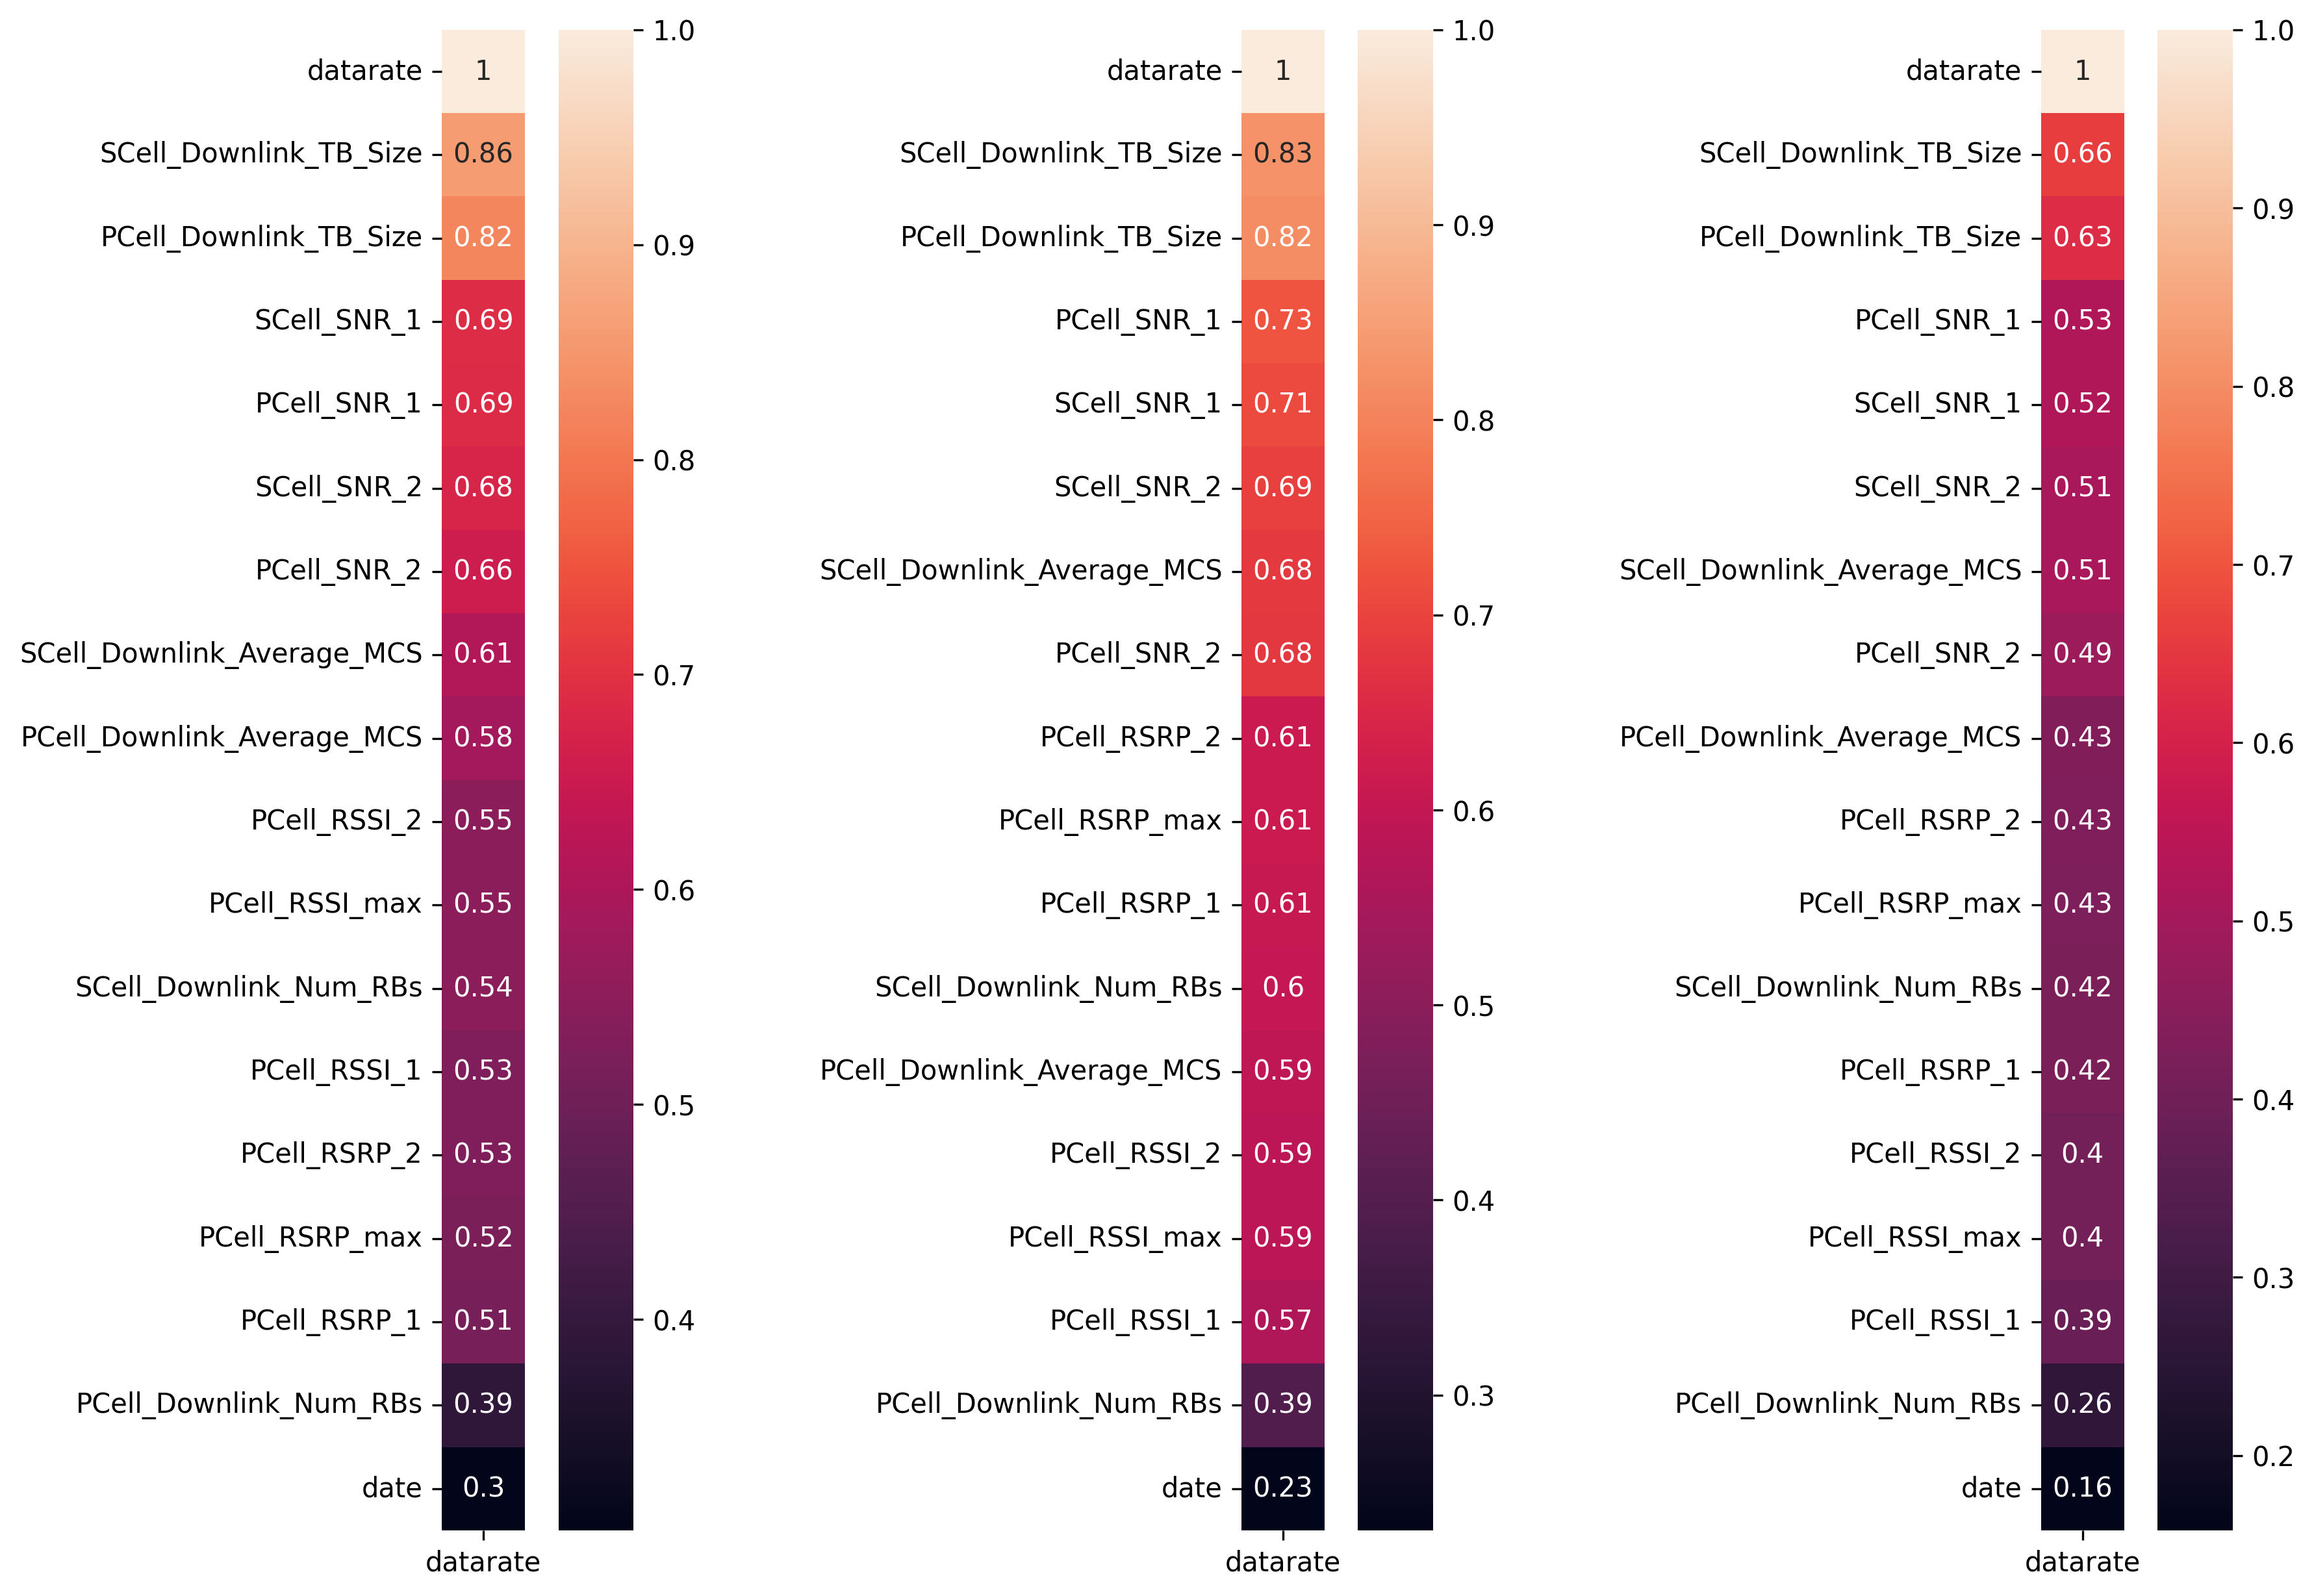

In [47]:
corr1, corr2, corr3 = multi_corr(filtered_data_downlink_selected, 'datarate')

In [ ]:
len(filtered_data_downlink) * 0.2
scope = 3912

In [ ]:
filtered_data_downlink.tail(scope)['datarate'].head()

In [ ]:
tail = filtered_data_downlink.tail(scope)
type(tail)

In [ ]:
tail = tail[['datarate']]
type(tail)

In [ ]:
tail.head()

In [ ]:
span = 8
pred_len = 48

truth = []
ewma8 = []
shifted = []

tail['EWMA8'] = tail['datarate'].ewm(span=span, min_periods=8, adjust=True).mean()

b_truth  = tail['datarate'].to_numpy()
b_ewma8 = tail['EWMA8'].to_numpy()

for i in range(len(b_truth) - span - pred_len):
    truth.append(b_truth[(i+span):(i+span+pred_len)])
    ewma8.append(np.repeat(b_ewma8[i+span-1], pred_len)) #correct?
    #ewma8.append(np.repeat(b_ewma8[i+span-0], pred_len)) #informer
    shifted.append(np.repeat(b_truth[i+span-1], pred_len))

#EWMA
rmse = mean_squared_error(truth, ewma8, squared=False)
mae = mean_absolute_error(truth, ewma8)
print(f'EWMA8 rmse: {rmse}, mae: {mae}')

#Shifted
rmse = mean_squared_error(truth, shifted, squared=False)
mae = mean_absolute_error(truth, shifted)
print(f'Shifted rmse: {rmse}, mae: {mae}')